In [1]:
# 한글 지원이 안돼서 나눔폰트 설치
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq    # 나눔폰트
import matplotlib.font_manager as fm # 아래 위치에 저장됨(나눔고딕으로 저장함)
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe) # fontManager에 ttf 파일 저장
# runtime Configuration
# 글자는 폰트 사이즈별로 폰트 이미지가 있어야함 -> font.family (이걸로 지정)


# plt rc 직접 지정
plt.rcParams.update({'font.size': 18, 'font.family':'NanumBarunGothic'})
plt.rc('figure', figsize =(10,10))
font_option = {'family':'NanumBarunGothic',
               'weight':'bold',
               'size':20}
plt.rc('font', **font_option)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


#nltk
 - Tokenization, Normalization, 품사 태깅, 개체명 인식
 - TM의 전처리에서 사용

In [2]:
import nltk
nltk.download('punkt_tab')
para = 'Hello everyone.'
from nltk.tokenize import sent_tokenize  # sent_tokenize: sentence(문장)으로 예측
sent_tokenize(para)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Hello everyone.']

#한국어

In [3]:
para_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 유후 앤 아아이"
sent_tokenize(para_kor)

['안녕하세요, 여러분.', '만나서 반갑습니다.', '유후 앤 아아이']

#Word Tokenize
  - 단어 별로 자름.

In [4]:
from nltk.tokenize import word_tokenize
word_tokenize(para)

['Hello', 'everyone', '.']

# RegexpTokenizer ( regular expression => 정규표현식 )

In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']+")  # 패턴 인식
tokenizer.tokenize("Can't is a contraction.")

["Can't", 'is', 'a', 'contraction']

# 불용어 처리

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#말뭉치 (corpus)

In [7]:
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english')) # 영어 불용어 리스트 획득
words = ["Can't", "is", "a", "contraction"]

[word for word in words if word not in english_stops]

["Can't", 'contraction']

### 사용자 불용어 리스트
  - 위에꺼는 nltk에서 만들어진 영어 불용어 리스트

In [8]:
my_stops = ['contraction', 'is']

[word for word in words if word not in my_stops]

["Can't", 'a']

#Tagging

In [9]:
nltk.download('averaged_perceptron_tagger')  # perceptron: 초창기 신경망

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
!pip install svgling

In [11]:
from svgling import draw_tree

In [12]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#named entity => 개체명 인식
  - 고유명사 인식해줌.
  - ne_chunk

In [13]:
from nltk import word_tokenize, pos_tag, ne_chunk  # chunk: 단위
nltk.download('averaged_perceptron_tagger_eng') # 품사 태깅

sentence = 'James is working at Disney in London'
sentence = pos_tag(word_tokenize(sentence))

print(sentence)   # NNP: 고유명사, VBZ: 동사, VBG: 현재분사, IN: 전치사

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


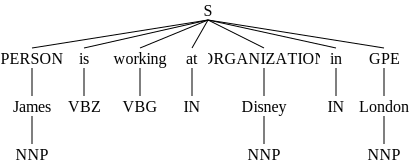

In [14]:
ne_chunk(sentence)

In [15]:
nltk.download('movie_reviews')  # 감상평: positive, negative

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [16]:
# list 안에 for문이 내장되어 있는 '내장리스트(comprehension)'

from nltk.corpus import movie_reviews

# document / category로 이루어짐.
documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

import random
random.shuffle(documents)  # positive와 negative가 몰리는 거 방지

In [17]:
documents[1][0]  # 리뷰한 데이터들 반으로 파싱
documents[100][1]
documents[100][0][:10]  # 01번째 문서의 첫 번째 내용 가져오고, 그 내용의 처음 10글자만 반환

['the',
 'swirling',
 'sick',
 'feeling',
 'hit',
 'me',
 'just',
 'a',
 'few',
 'minutes']

# 단어 빈도 계산

In [18]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
list(all_words)

[',',
 'the',
 '.',
 'a',
 'and',
 'of',
 'to',
 "'",
 'is',
 'in',
 's',
 '"',
 'it',
 'that',
 '-',
 ')',
 '(',
 'as',
 'with',
 'for',
 'his',
 'this',
 'film',
 'i',
 'he',
 'but',
 'on',
 'are',
 't',
 'by',
 'be',
 'one',
 'movie',
 'an',
 'who',
 'not',
 'you',
 'from',
 'at',
 'was',
 'have',
 'they',
 'has',
 'her',
 'all',
 '?',
 'there',
 'like',
 'so',
 'out',
 'about',
 'up',
 'more',
 'what',
 'when',
 'which',
 'or',
 'she',
 'their',
 ':',
 'some',
 'just',
 'can',
 'if',
 'we',
 'him',
 'into',
 'even',
 'only',
 'than',
 'no',
 'good',
 'time',
 'most',
 'its',
 'will',
 'story',
 'would',
 'been',
 'much',
 'character',
 'also',
 'get',
 'other',
 'do',
 'two',
 'well',
 'them',
 'very',
 'characters',
 ';',
 'first',
 '--',
 'after',
 'see',
 '!',
 'way',
 'because',
 'make',
 'life',
 'off',
 'too',
 'any',
 'does',
 'really',
 'had',
 'while',
 'films',
 'how',
 'plot',
 'little',
 'where',
 'people',
 'over',
 'could',
 'then',
 'me',
 'scene',
 'man',
 'bad',
 '

In [19]:
all_words.most_common(5)

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576)]

# 자주 등장하는 단어들 추출하여 확인

In [20]:
word_features = list(all_words)[:2000]
word_features

[',',
 'the',
 '.',
 'a',
 'and',
 'of',
 'to',
 "'",
 'is',
 'in',
 's',
 '"',
 'it',
 'that',
 '-',
 ')',
 '(',
 'as',
 'with',
 'for',
 'his',
 'this',
 'film',
 'i',
 'he',
 'but',
 'on',
 'are',
 't',
 'by',
 'be',
 'one',
 'movie',
 'an',
 'who',
 'not',
 'you',
 'from',
 'at',
 'was',
 'have',
 'they',
 'has',
 'her',
 'all',
 '?',
 'there',
 'like',
 'so',
 'out',
 'about',
 'up',
 'more',
 'what',
 'when',
 'which',
 'or',
 'she',
 'their',
 ':',
 'some',
 'just',
 'can',
 'if',
 'we',
 'him',
 'into',
 'even',
 'only',
 'than',
 'no',
 'good',
 'time',
 'most',
 'its',
 'will',
 'story',
 'would',
 'been',
 'much',
 'character',
 'also',
 'get',
 'other',
 'do',
 'two',
 'well',
 'them',
 'very',
 'characters',
 ';',
 'first',
 '--',
 'after',
 'see',
 '!',
 'way',
 'because',
 'make',
 'life',
 'off',
 'too',
 'any',
 'does',
 'really',
 'had',
 'while',
 'films',
 'how',
 'plot',
 'little',
 'where',
 'people',
 'over',
 'could',
 'then',
 'me',
 'scene',
 'man',
 'bad',
 '

In [21]:
# 문서에 있는 중요단어를 추출해서 리턴
# 자주 등장하는 단어로 문서를 재표현(문서의 복잡성 줄인다는 것)
# 노이즈를 제거하고 있음.

def document_features(document):  # 문서가 입력되면
  # 문서 중에 중복된 단어 제거
  document_words = set(document)  # set -> python core: list, tuple(수정불가), dict(키+데이터), set(키, 중복 제거)
  features = {}
  for word in word_features:
    features['contains({})'.format(word)] = (word in document_words)
  return features

### documents => document, category가 들어있음.

In [22]:
featuresets = [(document_features(d), c) for (d, c) in documents]

# 훈련 데이터와 테스트 데이터로 분리
train_set, test_set = featuresets[100:], featuresets[:100]

# 조건부확률을 이용하여 분류하는 모델: text 대상
# positive, negative 단어의 비율이 나옴.
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [23]:
# 들어온 데이터를 classifier하여 정확도 확인

print(nltk.classify.accuracy(classifier, test_set))

0.77


In [24]:
!pip install gensim

In [25]:
import gensim

print(gensim.__version__)

4.3.3


#Corpus: 말뭉치
  - corpora: 툴
  - 사전: text 추출 (사전에 있는 것만 추출)

In [26]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer']]  # 문장
dct = Dictionary(texts)

dct.add_documents([['cat', 'say', 'meow'], ['dog']])  # 사전에 등록

# 7개의 단어로 이뤄진 사전
# bow -> bag of word
dct.doc2bow(['dog', 'computer', 'non_existent_word'])  # 'dog' -> ID: 6, 빈도수: 1

[(0, 1), (6, 1)]

In [27]:
print("문서 수", dct.num_docs)  # num_docs: [], [], [] 3개!
print("처리된 워드 수", dct.num_pos)
print("non-zeros가 아닌 것", dct.num_nnz)

dct.add_documents([['cat', 'say', 'meow'], ['dog']])  # 같은 것은 영향이 없음.
print(dct.doc2bow(['dog', 'computer', 'non_existent_word'],
                  return_missing = True))

print("단어 수", len(dct))

문서 수 3
처리된 워드 수 7
non-zeros가 아닌 것 7
([(0, 1), (6, 1)], {'non_existent_word': 1})
단어 수 7


In [28]:
# 사전 인덱스를 출력
print(dct.doc2idx(['interface', 'human', 'c', 'not_in_dictionary', 'c']))

# token2id: 사전에 있는 토큰의 번호
print(dct.token2id)  # dictionary 사용해서 처리

[2, 1, -1, -1, -1]
{'computer': 0, 'human': 1, 'interface': 2, 'cat': 3, 'meow': 4, 'say': 5, 'dog': 6}


# 문제 1

In [29]:
# 단어가 입력되면 몇 번 인덱스인지 확인해보시오.

keydata = dct.token2id
keydata['meow']

4

In [30]:
dct[6]  # 사전에 인덱스를 주면, 단어를 알려줌.

'dog'

### 사전 관리

In [31]:
# cat을 사전에서 제거
dct.filter_tokens(bad_ids = [dct.token2id['cat']])
print('ema' in dct.token2id)

len(dct)

# computer만 남기고 나머지는 제거
dct.filter_tokens(good_ids = [dct.token2id['computer']])
len(dct)

False


1

# e-mail 보내주신 데이터 활용

In [32]:
import pprint
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [33]:
stoplist = set('for a of the and to in'.split(' '))
texts = [[word for word in document.lower().split()  # 소문자로 만들고 찢음
if word not in stoplist]
         for document in text_corpus]

texts

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

# 1번 이상 등장하는 단어

In [34]:
from collections import defaultdict

# 단어의 출현 빈도 (전체 문서에 있는 단어들에 대한 빈도)
frequency = defaultdict(int)  # int 형으로 초기화 (0)

for text in texts:  # 문장
  for token in text:   # 단어
    frequency[token] += 1  # dict 데이터에 데이터를 추가
processed_corpus = [[token for token in text if frequency[token] > 1]  # 빈도수가 1보다 크면 남겨두도록
                    for text in texts]
pprint.pprint(processed_corpus)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


# Dictionary
  - 사전 만들기

In [35]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...>


In [36]:
pprint.pprint(dictionary.token2id)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [37]:
token_dict = dictionary.token2id
token_dict['response']  # 사전에 있는 데이터 추출할 수 있어졌어요~~

3

### 문제 2

In [38]:
# ['한국', '대한', '만세']를 사전으로 작성
# ['고양이', '말해', '사랑'], ['개']를 사전에 추가
# ['개', '컴퓨터', 'non_existent_word'] 문서에 대한 bow를 구성하시오.

In [39]:
from gensim.corpora import Dictionary
import pprint

text2 = [['한국', '대한', '만세']]
dct = Dictionary(text2)

dct.add_documents([['고양이', '말해', '사랑'], ['개']])
print(dct.token2id)

dct.doc2bow(['개', '컴퓨터', 'non_existent_word'])

{'대한': 0, '만세': 1, '한국': 2, '고양이': 3, '말해': 4, '사랑': 5, '개': 6}


[(6, 1)]

# (Index, Count)
  - 단어장에 있는 어떤 인덱스인지, 몇 개 인지 출력

In [40]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)  # 단어의 번호로 변경됨.

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]


# 역문서빈도

In [41]:
# bow_corpus... 데이터 다 날아가고 <<인덱스 + 도수>>만 남음.

from gensim import models

tfidf = models.TfidfModel(bow_corpus)  # 역문서 빈도를 고려한 데이터
tfidf

# 역문서 빈도

In [42]:
tfidf.idfs

{0: 2.1699250014423126,
 1: 2.1699250014423126,
 2: 2.1699250014423126,
 3: 2.1699250014423126,
 4: 2.1699250014423126,
 5: 1.5849625007211563,
 6: 2.1699250014423126,
 7: 1.5849625007211563,
 8: 2.1699250014423126,
 9: 1.5849625007211563,
 10: 1.5849625007211563,
 11: 2.1699250014423126}

In [43]:
for word_id, idf_value in tfidf.idfs.items():
  print(dictionary[word_id], ":", idf_value) # 사람이 알 수 있도록

computer : 2.1699250014423126
human : 2.1699250014423126
interface : 2.1699250014423126
response : 2.1699250014423126
survey : 2.1699250014423126
system : 1.5849625007211563
time : 2.1699250014423126
user : 1.5849625007211563
eps : 2.1699250014423126
trees : 1.5849625007211563
graph : 1.5849625007211563
minors : 2.1699250014423126


In [44]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # 역문서 빈도값 구해줌

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [45]:
for doc in bow_corpus:
  print([(dictionary[id], score) for id, score in tfidf[doc]])

[('computer', 0.5773502691896257), ('human', 0.5773502691896257), ('interface', 0.5773502691896257)]
[('computer', 0.44424552527467476), ('response', 0.44424552527467476), ('survey', 0.44424552527467476), ('system', 0.3244870206138555), ('time', 0.44424552527467476), ('user', 0.3244870206138555)]
[('interface', 0.5710059809418182), ('system', 0.4170757362022777), ('user', 0.4170757362022777), ('eps', 0.5710059809418182)]
[('human', 0.49182558987264147), ('system', 0.7184811607083769), ('eps', 0.49182558987264147)]
[('response', 0.6282580468670046), ('time', 0.6282580468670046), ('user', 0.45889394536615247)]
[('trees', 1.0)]
[('trees', 0.7071067811865475), ('graph', 0.7071067811865475)]
[('trees', 0.5080429008916749), ('graph', 0.5080429008916749), ('minors', 0.695546419520037)]
[('survey', 0.6282580468670046), ('graph', 0.45889394536615247), ('minors', 0.6282580468670046)]


In [46]:
corpus_tfidf = tfidf[bow_corpus]
for doc in corpus_tfidf:
  print(doc)

[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(0, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.44424552527467476), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.3244870206138555)]
[(2, 0.5710059809418182), (5, 0.4170757362022777), (7, 0.4170757362022777), (8, 0.5710059809418182)]
[(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(4, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


#역문서 빈도를 고려한 가중치로 변경

In [47]:
!pip install --upgrade scipy gensim

  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3


In [48]:
!pip install scipy==1.9.3

  Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, but you have scipy 1.9.3 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
albumentations 2.0.5 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
cvxpy 1.6.2 requires scipy>=1.11.0, but you have scipy 1.9.3 which is incompatible.
scikit-image 0.25.2 requires scipy

In [49]:
import gensim
from gensim import corpora, models
from gensim.models import LsiModel

In [50]:
# 중요한 건. 이 모델이 SVD을 사용해서 Topic을 찾아낸다는 것 ^^.
# 데이터에는 단어의 의미가 없음 (숫자로 맵핑된 데이터)

lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)
corpus_lsi = lsi_model[corpus_tfidf]

In [51]:
sentences = [list(s) for s in movie_reviews.sents()]
print('0번 문장', sentences[0])
print('1번 문장', sentences[1])

0번 문장 ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
1번 문장 ['they', 'get', 'into', 'an', 'accident', '.']


# Word2Vec을 이용한 embedding
 - 사전 없이 미리 학습된 모델을 이용해서 embedding

In [52]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences)  # vector로 변환: deep learning 이용
model_name = 'test1'
model.save(model_name)

In [53]:
print(model.wv.similarity('actor', 'actress'))  # 단어의 유사도 고려해서 embedding 함.
print(model.wv.similarity('actor', 'she'))
print(model.wv.most_similar('accident'))  # '사고'하고 가장 가까운 유사도를 가진 데이터들

0.90310335
0.24267016
[('island', 0.8517295718193054), ('prison', 0.8446979522705078), ('plane', 0.8427160978317261), ('building', 0.8421157002449036), ('evening', 0.8396285176277161), ('boat', 0.8372502326965332), ('bus', 0.8269695043563843), ('whirlwind', 0.8256115317344666), ('meeting', 0.8241252303123474), ('bar', 0.8209066987037659)]


In [54]:
model.wv.most_similar("man")  # 의미론적으로 유사한 단어

[('woman', 0.8920371532440186),
 ('girl', 0.8368532061576843),
 ('killer', 0.8065276741981506),
 ('boy', 0.7896873950958252),
 ('child', 0.7734030485153198),
 ('kid', 0.7690718173980713),
 ('doctor', 0.7341316938400269),
 ('guy', 0.7254021167755127),
 ('person', 0.722491979598999),
 ('dog', 0.6921675205230713)]

In [55]:
# 조금 깊이 들어가자면~
print(model.wv.most_similar(positive = ['actor', 'she'],
                            negative = 'actress',
                            topn = 3))

[('he', 0.8440143465995789), ('everyone', 0.6948845982551575), ('him', 0.6181579232215881)]


#LDA
 - Topic 분석
 - Dirichlet: 분포
 - nltk, gensim(얘네는 밑에서 제어) => sklearn (추상화)

In [56]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    'AI is the future of technology',
    'Machine learning is a subset of AI',
    'Data science uses AI and machine learning'
]
# 불용어 제거 진행하면 더 정확하게 나와요~

In [57]:
vectorizer = CountVectorizer() # 단어에 대한 배열을 생성하고 인덱스 생성
X = vectorizer.fit_transform(documents)  # 문서의 단어들을 분리해서 몇 번 등장했는지 더해서 X값으로 대체

# 2개의 주제로 분리하라
lda = LatentDirichletAllocation(n_components=2, random_state=42)
X_topics = lda.fit_transform(X)  # 2개의 topic에 단어 배정 후 확률 * 그 단어 topic에서의 확률

In [58]:
# 추출되어진 단어들 (숫자 인덱스로 단어들 추출)
feature_names = vectorizer.get_feature_names_out()

def print_top_words(model, feature_names, n_top_words=5):  # 5개의 단어만 추출하라
    for topic_idx, topic in enumerate(model.components_):  # model이 만든 결과가 components에 들어있따.
        print(f"Topic {topic_idx + 1}: ", end="")

        # argsort: 인덱스 정렬 (가장 확률이 높은 것을 중심으로 정렬)
        # -1 이니까 역순으로 *_*
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print("Original Shape:", X.shape)
print("Reduced Shape:", X_topics.shape)
print("\nTop words in each topic:")
print_top_words(lda, feature_names)

Original Shape: (3, 13)
Reduced Shape: (3, 2)

Top words in each topic:
Topic 1: learning machine ai science uses
Topic 2: of is ai technology the


#WordCloud

In [59]:
!pip install Pyro4
!pip install jpype1
!pip install konlpy
!pip install simplejson
!pip install pygame
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.1 MB/s eta 0:00:00


In [61]:
from konlpy.tag import Kkma  # 서울대 개발
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


### 명사만 추출

In [62]:
pprint (kkma.nouns(u"아버지가 방에 들어가신다. 그 방에는 내 동생이 있다."))

['아버지', '방', '내', '동생']


In [63]:
from konlpy.tag import Okt
okt = Okt()

# 전체 다 해준다.
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))

# 명사만 뺀다.
print(okt.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
['항공기', '체계', '종합', '개발', '경험']


In [64]:
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [65]:
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

/usr/local/lib/python3.11/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('손흥민', 14), ('경기', 7), ('골', 7), ('토트넘', 5), ('달', 4), ('스포', 3), ('탈', 3), ('코리아', 3), ('시즌', 3), ('초', 3)]


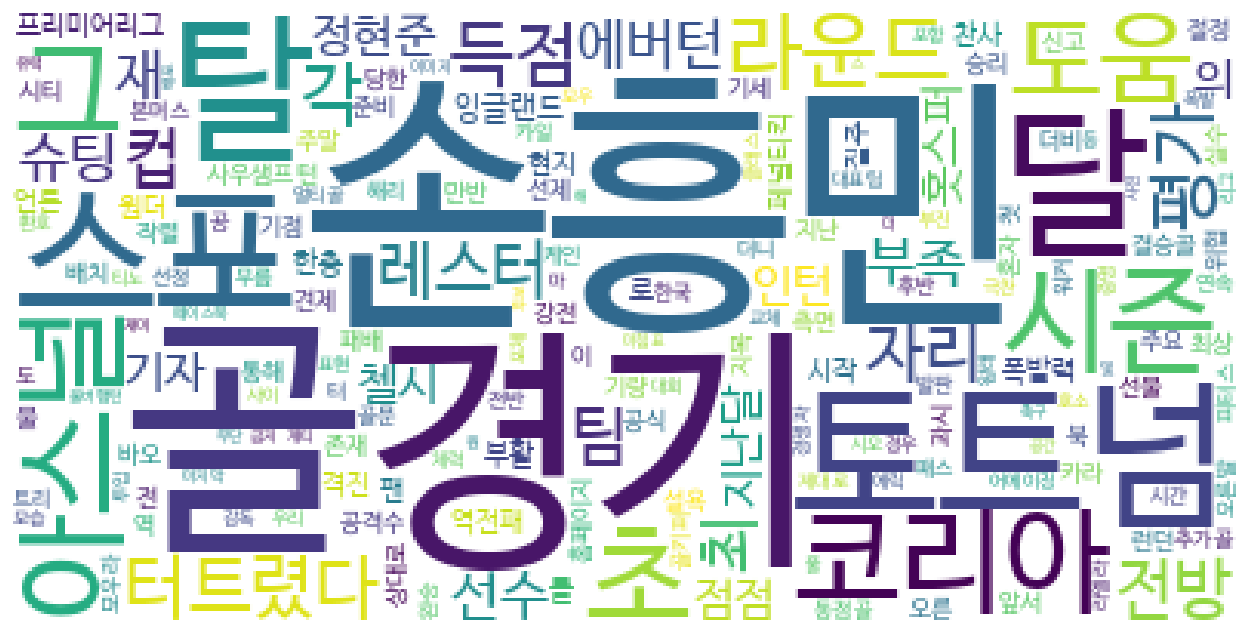

In [66]:
#kkma = Kkma()

# html 문서
res = requests.get('https://sports.v.daum.net/v/20181227140914322')

# parsing
soup = BeautifulSoup(res.content, 'html.parser')

# 데이터 기사 선택
body = soup.select('.article_view')[0]

# p tag를 하나씩 가져옴.
# 태그는 내용 출력을 하게 함 -> 내용 텍스트
text = " ".join(p.get_text() for p in body.find_all('p'))
t = Twitter()  # 얘도 konlpy에 있음.
tokens_ko = t.nouns(text) # 명사만 추출

# nltk
ko = nltk.Text(tokens_ko, name = '스포츠')
print(ko.vocab().most_common(10) )  # 자주 등장하는 단어
data = ko.vocab().most_common(500)  # 자주 등장하는 500개의 단어

# 불용어 제거
stopwords = ['점점', '지난', '측면', '기세', '북', '격진', '더비', '시오', '포체'
            '기점', '의', '이' , '당한', '로', '오른', '사이', '탈']
tokens = [each_word for each_word in data if each_word not in stopwords]
tmp_data = dict(tokens)

# Word Cloud 데이터로 dict 형태를 요구
wordcloud = WordCloud(font_path=fontpath, relative_scaling = 0.1,
                     background_color='white',stopwords=stopwords,).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()